In [1]:
import cv2
from PIL import Image

In [2]:
import pytesseract
import cv2
import tempfile
import re
from PIL import Image

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pytesseract

In [5]:
from pytesseract import Output

In [6]:
import re

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text.strip()  # Remove leading and trailing spaces

# Example usage:
text = "Hello! This is an example text with $pecial characters and   multiple     spaces  !"
cleaned_text = clean_text(text)
print(cleaned_text)


Hello This is an example text with pecial characters and multiple spaces


In [7]:
img = cv2.imread("resources/max.jpg", flags=cv2.IMREAD_GRAYSCALE)
imgCol = cv2.imread("resources/max.jpg")
#cv2.imwrite('imgColoutput_image.png', imgCol, [cv2.IMWRITE_PNG_COMPRESSION, 0])

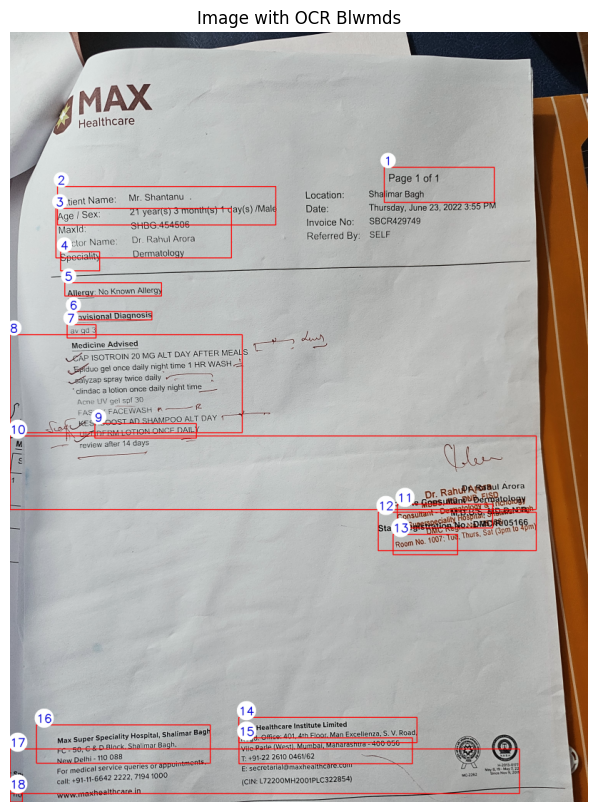

Key: 1, Value: Page 1 ets ee oes
Key: 2, Value: Patient Name Mr Shantanu es years 3 months 1 caval IMale
Key: 3, Value: Age Sex Maxtd SHBG454506 Doctor Name Or Rahul Arora ees ee
Key: 4, Value: Speciality
Key: 5, Value: Allergy No Known Allergy
Key: 6, Value: Provisional Diagnosis
Key: 7, Value: av gd 3
Key: 8, Value: oh Medicine Advised sp aera ISOTROIN 20 MG ALT T DAY Y AFTER MEAL gel once daily night time 4 HR WASH spray twice daily a ee clindac a lotiononce daily night ti oe Acne UV gel spf 30 FASHX 7 a MG Lt AD SHAMPOO ALT DAY
Key: 9, Value: iIDERM LOTION ONCE DAILY
Key: 10, Value: M teview after 14 days SE ne a ches ee Ba anu Arora 7 associate a ee
Key: 11, Value: Consultant a8
Key: 12, Value: 4 A ln BORG mio
Key: 13, Value: Room No scart
Key: 14, Value: Max Healthcare Institute Limited a Regd Office 401 4th Floor Man Excellenza S NV Road
Key: 15, Value: Vile Parle West Mumbai Maharashtra 400 056 om Ty F9122 2610 046162 Be eS
Key: 16, Value: es Max Super Speciality Hospital Shali

In [46]:

new_img = cv2.adaptiveThreshold(
    img, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    61,
    11
)

data = pytesseract.image_to_data(new_img, output_type=Output.DICT)

# Create a dictionary to store blocks
blocks = {}

# Iterate over each text element
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 0:  # Only consider text with confidence > 0
        block_num = data['block_num'][i]
        text = data['text'][i]
        text = clean_text(text)
        if text == "":
            continue
        left, top, width, height = data['left'][i], data['top'][i], data['width'][i], data['height'][i]

        # Add the text to the corresponding block
        if block_num not in blocks:
            blocks[block_num] = {'text': text, 'left': left, 'top': top, 'width': width, 'height': height}
        else:
            # Extend the boundaries of the block
            blocks[block_num]['left'] = min(blocks[block_num]['left'], left)
            blocks[block_num]['top'] = min(blocks[block_num]['top'], top)
            blocks[block_num]['width'] = max(blocks[block_num]['width'], left + width - blocks[block_num]['left'])
            blocks[block_num]['height'] = max(blocks[block_num]['height'], top + height - blocks[block_num]['top'])
            blocks[block_num]['text'] += ' ' + text  # Concatenate additional text

# Create a copy of the image to draw the rectangles
img_with_blocks = imgCol.copy()

# Draw a rectangle around each block and print text
new_block_num = 1
image_data = {}
text_data = ""
for block_num, block_data in blocks.items():
    left, top, width, height = block_data['left'], block_data['top'], block_data['width'], block_data['height']
    cv2.rectangle(img_with_blocks, (left, top), (left + width, top + height), (255, 0, 0), 4) #BGR
    if(new_block_num<10):
        circLeft = left+20
        radius = 40
    else:
        circLeft = left+40
        radius = 50
    cv2.circle(img_with_blocks, (circLeft, top - 35), radius, (255, 255, 255), -1)  # -1 fills the circle
    cv2.putText(img_with_blocks, str(new_block_num), (left, top - 12), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 215), 4)
    # print(f"Block {new_block_num} Text: {block_data['text']}")
    image_data[str(new_block_num)]= block_data['text']
    text_data += " "+block_data['text']
    new_block_num+=1
    
#save image 
max_width, max_height = 1920, 1080
height, width = img_with_blocks.shape[:2]

if width > max_width or height > max_height:
    # Calculate the scaling factor
    scaling_factor = min(max_width / width, max_height / height)
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    
    # Resize the image
    resized_image = cv2.resize(img_with_blocks, (new_width, new_height), interpolation=cv2.INTER_AREA)
else:
    # If the image does not need resizing, keep it as it is
    resized_image = img_with_blocks

#cv2.imwrite('output_image.png', resized_image, [cv2.IMWRITE_PNG_COMPRESSION, 0])
#cv2.imwrite('lol/output_image_quality_100_resized.jpg', resized_image, [cv2.IMWRITE_JPEG_QUALITY, 100])

#new_img2 = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(resized_image)
plt.title("Image with OCR Blwmds")
plt.axis('off')
plt.show()


for key, value in image_data.items():
    print(f"Key: {key}, Value: {value}")

print(text_data)